# Week 2 Homework

In [4]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import uniform
np.random.seed(0)

## Hoeffding Inequality

In [2]:
# Create 1000 coins and obtain v_1, v_rand, v_min
def coin_tosses (n=1000):
    coins = [np.random.randint(2, size=10) for k in range(n)]
    v_all = [np.mean(coin) for coin in coins]
    v_1 = v_all[0]
    v_rand = v_all[np.random.randint(n)]
    v_min = min(v_all)
    return (v_1, v_rand, v_min)

coin_tosses()

(0.80000000000000004, 0.40000000000000002, 0.10000000000000001)

In [43]:
# Repeat experiment 1000 times to get distribution
def coin_simulation(n=1000):
    v_1_dist, v_rand_dist, v_min_dist = [], [], []    
    for i in range(n):
        v_1, v_rand, v_min = coin_tosses()
        v_1_dist.append(v_1)
        v_rand_dist.append(v_rand)
        v_min_dist.append(v_min)
    return v_1_dist, v_rand_dist, v_min_dist

v_1_dist, v_rand_dist, v_min_dist = coin_simulation()

In [44]:
# Figure out means
print np.mean(np.array(v_1_dist))
print np.mean(np.array(v_rand_dist))
print np.mean(np.array(v_min_dist))

0.5039
0.4987
0.0389


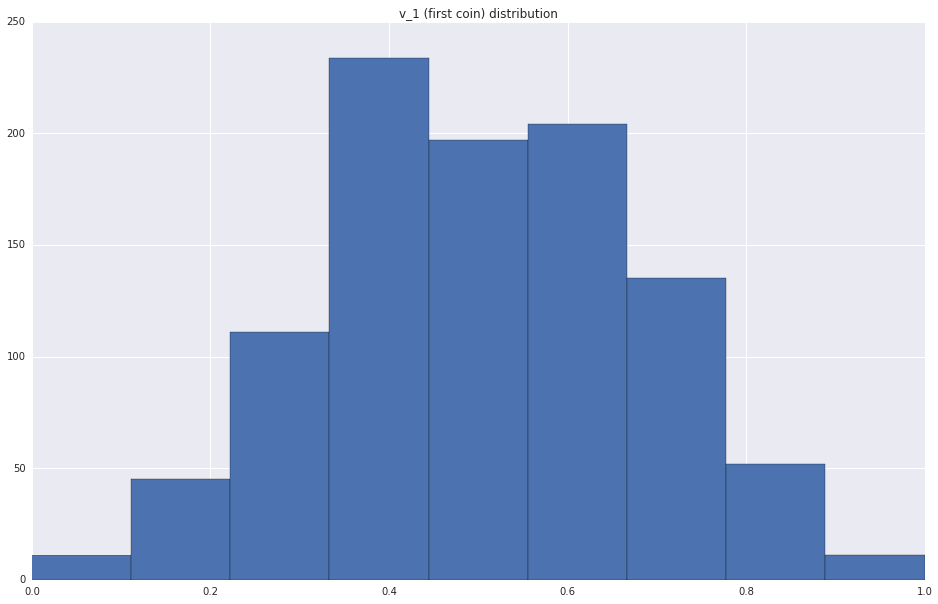

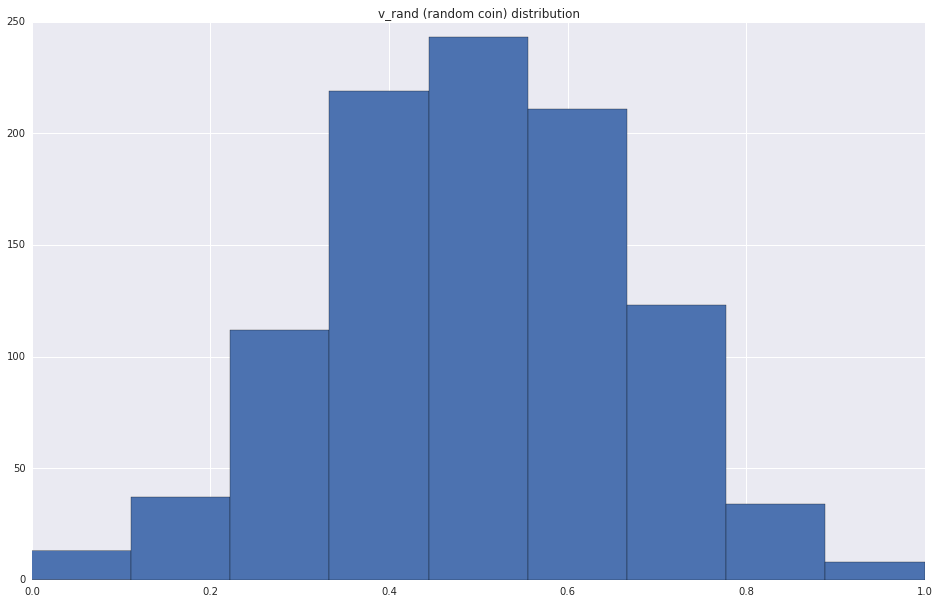

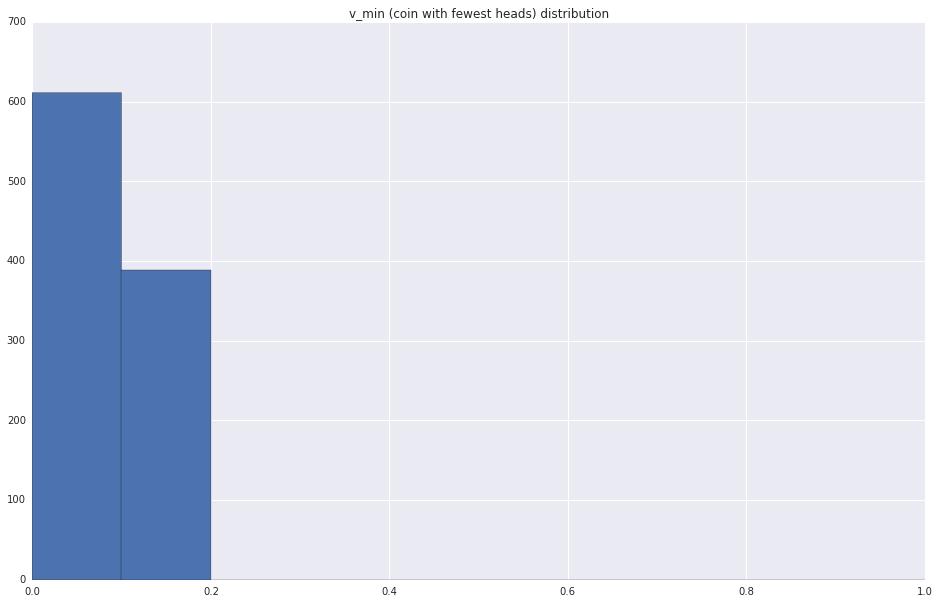

In [56]:
# Plot results
plt.figure(figsize=(16,10))
plt.hist(v_1_dist, bins=9, range=(0,1))
plt.title("v_1 (first coin) distribution")
plt.figure(figsize=(16,10))
plt.hist(v_rand_dist, bins=9, range=(0,1))
plt.title("v_rand (random coin) distribution")
plt.figure(figsize=(16,10))
plt.hist(v_min_dist, bins=10, range=(0,1))
plt.title("v_min (coin with fewest heads) distribution")

## Linear Regression

In [7]:
# Generate random points
def generate_points(N):
    """
    Input: number of random points to be generated in [-1,1]x[-1,1]
    Output: coordinates of points, adding x0 = 1's
    """
    xs = uniform(-1,1,N)
    ys = uniform(-1,1,N)
    # Generate vector of ones in the 0th column
    return np.array(zip(np.ones(N), xs, ys))

In [8]:
# Create function f and assign positives and negatives
def assignment(points):
    """
    Input: random points
    Output: positive and negative labels, according to random linear function f that separates these points
    """
    # Randomly select 2 2-D points and 1 direction
    (x1, y1, x2, y2, direction) = uniform(-1,1,5)
    # Calculate slope and intercept
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    # Convert to a weight vector
    w = [-b, -m * np.sign(direction), 1*np.sign(direction)]  
    # Label points
    labels = np.sign(np.dot(points, w))    
    return (w, labels)

Use linear regression to classify points (+1, -1). Calculate average in-sample error.

In [25]:
# Linear regression algorithm
def lin_reg(points, labels):
    """
    Input: training points and labels
    Output: in-sample classification error
    """
    # Pseudo-inverse of X times y
    return np.dot(np.linalg.pinv(points), labels)

# Repeat 1000 times
def lin_reg_experiment(times, N):
    """
    Input: number of times experiment is run, number of points generated
    Output: average in-sample classification error
    """
    errors = []
    for run in range(times):
        # Generate training points
        points = generate_points(N)
        # Assign labels
        w, labels = assignment(points)
        # Fit weights, estimate y and calculate errors
        w_est = lin_reg(points, labels)
        y_est = np.sign(np.dot(points, w_est))
        E_in = np.mean(labels!=y_est)
        errors.append(E_in)
    return np.mean(errors)

print lin_reg_experiment(1000, 100)

0.03944


Generate 1000 fresh points to calculate average out-of-sample error.

In [30]:
def E_out_experiment(times, N_train, N_test):
    """
    Input: number of times experiment is run, number of training points, number of test points
    Output: average out-of-sample classification error
    """
    errors = []
    for run in range(times):
        # Generate training points
        train_points, test_points = generate_points(N_train), generate_points(N_test)
        # Assign training labels
        w, train_labels = assignment(train_points)
        # Assign test labels
        test_labels = np.sign(np.dot(test_points, w))    
        # Fit weights, estimate y and calculate errors
        w_est = lin_reg(train_points, train_labels)
        # Predict on test points and calculate errors
        y_est = np.sign(np.dot(test_points, w_est))
        E_out = np.mean(test_labels!=y_est)
        errors.append(E_out)
    return np.mean(errors)

print (E_out_experiment(1000, 100, 1000))

0.050681


Use linear regressiont as an initial weight for PLA.

In [38]:
# Run PLA till convergence
def PLA(points, labels):
    """
    Input: number of random points generated
    Output: number of iterations till convergence
    """
    # Initialize weight (with linear regression) and iteration count
    w_est = lin_reg(points, labels)
    iters = 0
    accuracy = 0
    
    # Iterate to improve weights
    while accuracy < 1:
        # Make and evaluate predictions
        preds = np.sign(np.dot(points, w_est))
        wrong_points = points[preds != labels]
        wrong_labels = labels[preds != labels]
        
        # Measure accuracy of current iteration
        accuracy = np.mean(preds == labels)
        
        # Randomly pick one misclassified point and update weight
        if accuracy < 1:
            index = np.random.randint(wrong_points.shape[0])
            w_est = w_est + wrong_labels[index] * wrong_points[index]        
        iters += 1
    return iters

In [40]:
def PLA_with_LR(times, N):
    """
    Input: number of times experiment is run, number of training points
    Output: average number of iterations till convergence
    """
    iters = []
    for run in range(times):
        # Generate points and labels
        points = generate_points(N)
        w, labels = assignment(points)
        # Run PLA and obtain iterations
        iters_per = PLA(points, labels)
        iters.append(iters_per)
    return np.mean(iters)

PLA_with_LR(2000,10)

5.3704999999999998

Took an average of 5.4 iterations, much quicker than the ~10 iterations with the zero vector initialization.